In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

In [2]:
mat = np.genfromtxt("data.csv",delimiter=",")

In [3]:
model = keras.models.load_model('model.model')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [4]:
np.random.shuffle(mat)
# Split 80/20 train/test
train = mat[:int(0.8*np.shape(mat)[0]),:]
valid = train[int(0.8*np.shape(mat)[0]):]
train = train[:int(0.8*np.shape(mat)[0])]
test = mat[int(0.8*np.shape(mat)[0]):,:]

(32, 32)
[[0.49171585 1.4690777 ]]


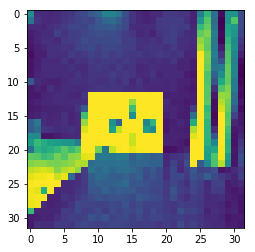

In [5]:
image = cv2.imread("wean_wide_interesting.left-rectified.00000894.t_001268594709.554428.png")
image = cv2.resize(image,(32,32))
image = image[:,:,0]
plt.imshow(image)
print(image.shape)
image = np.reshape(image,(1,1024,))
image = image/255
pre = model.predict(image)
print(pre)

(1024,)
(1, 1024)
[[1.007278   0.02003722]]
Actual : 1.0, -0.0
Predict: 1.0072779655456543, 0.020037222653627396


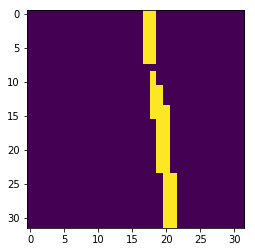

In [6]:
np.random.shuffle(test)
row = test[0]
img = row[:32*32]
print(np.shape(img))
vel = row[32*32:]
img2 = np.reshape(img,(32,32))
plt.imshow(img2)

img = np.reshape(img,(1,1024,))

print(np.shape(img))
pre = model.predict(img)
print(pre)

print(f"Actual : {vel[0]}, {vel[1]}")
print(f"Predict: {pre[0][0]}, {pre[0][1]}")

In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               307500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 402       
Total params: 408,302
Trainable params: 408,302
Non-trainable params: 0
_________________________________________________________________
None
